# 2.1 Quantile und Quantilfunktionen

In [1]:
source("util.R") # enthält einige allgemeine Hilfsfunktionen
options(repr.plot.width=25, repr.plot.height=10)

## Quantil einer t-Verteilung
Darstellung des 0.3-Quantils einer t-Verteilung mit 2 Freiheitsgraden

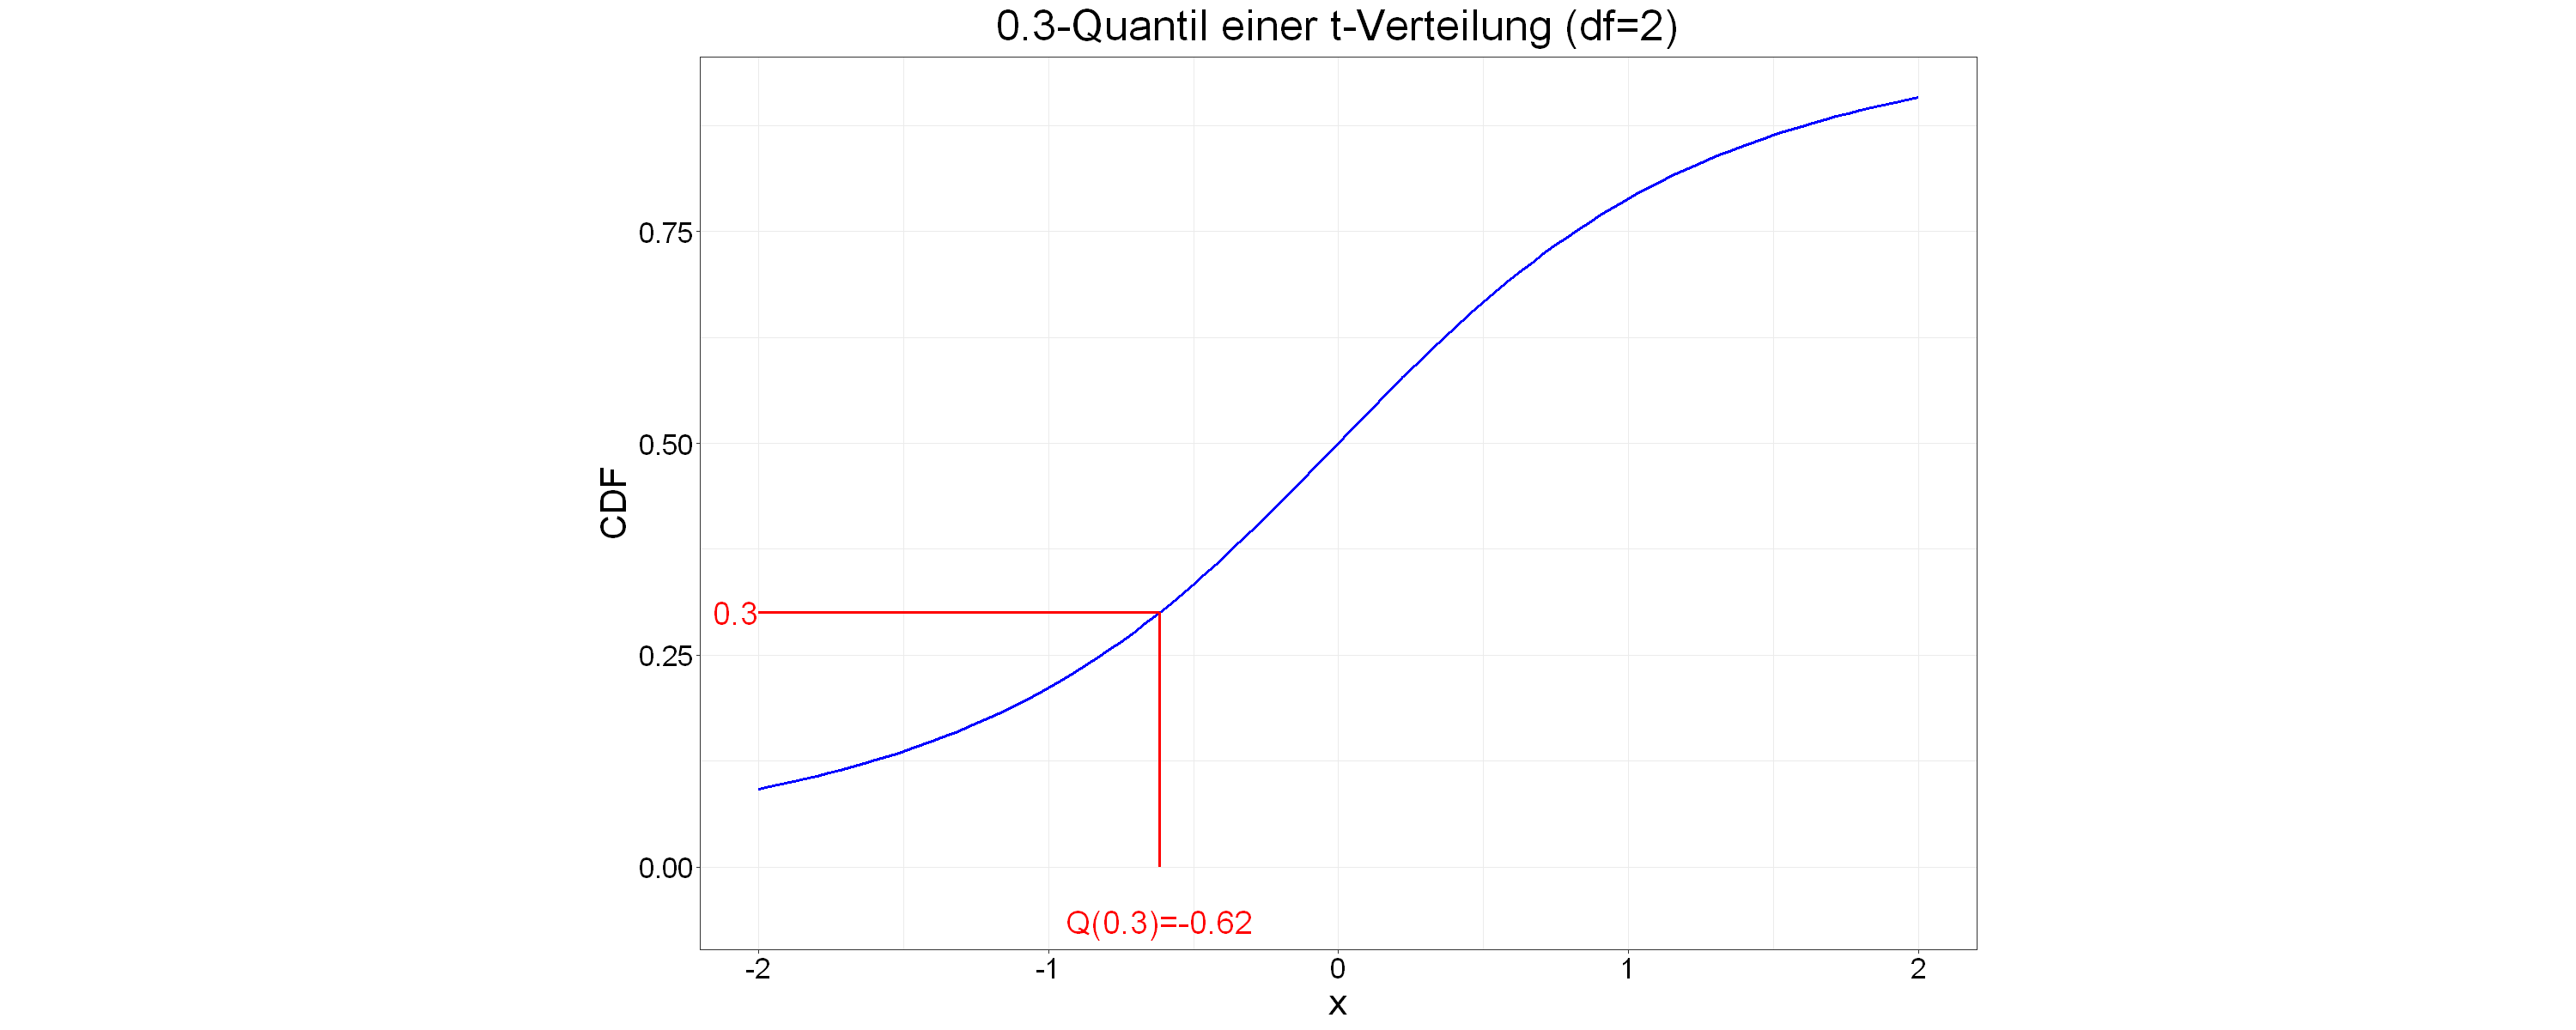

In [2]:
# pfunc und qfunc sind die Funktionen, die in der generischen Funktion 'cdf_with_quantile_plot'
# verwendet werden. Sie werden erzeugt durch partielle Anwendung des df Parameters auf
# die Standard R Funktionen pt und qt
df = 2
pfunc <- partial_func(pt, df = df)
qfunc <- partial_func(qt, df = df)

x_low <- -2
x_high <- 2
distribution <- sprintf("t-Verteilung (df=%d)", df)

p=0.3
plot <- cdf_with_quantile_plot(pfunc, qfunc, 
                               x_low, x_high, 
                               p, 
                               distribution, 
                               label_size=8) +
        theme_jupyter() +  
        theme(aspect.ratio = 0.7)
print(plot)

## $\sigma$-Werte der Normalverteilung als Quantile
Der folgende Plot illustriert, wie die empirischen Regeln der Normalverteilung im Kontext von Quantilen interpretiert werden können. Zum Beispiel ist bekannt, dass 68.2% der Werte innerhalb des Intervals $[-\sigma,\sigma]$ liegen. Daraus folgt unter Berücksichtigung der Symmetrie der Normalverteilung, dass der Wert $x=-\sigma$ das Quantil zu dem Wert $p=(1-0.682)/2=0.159$ darstellt.

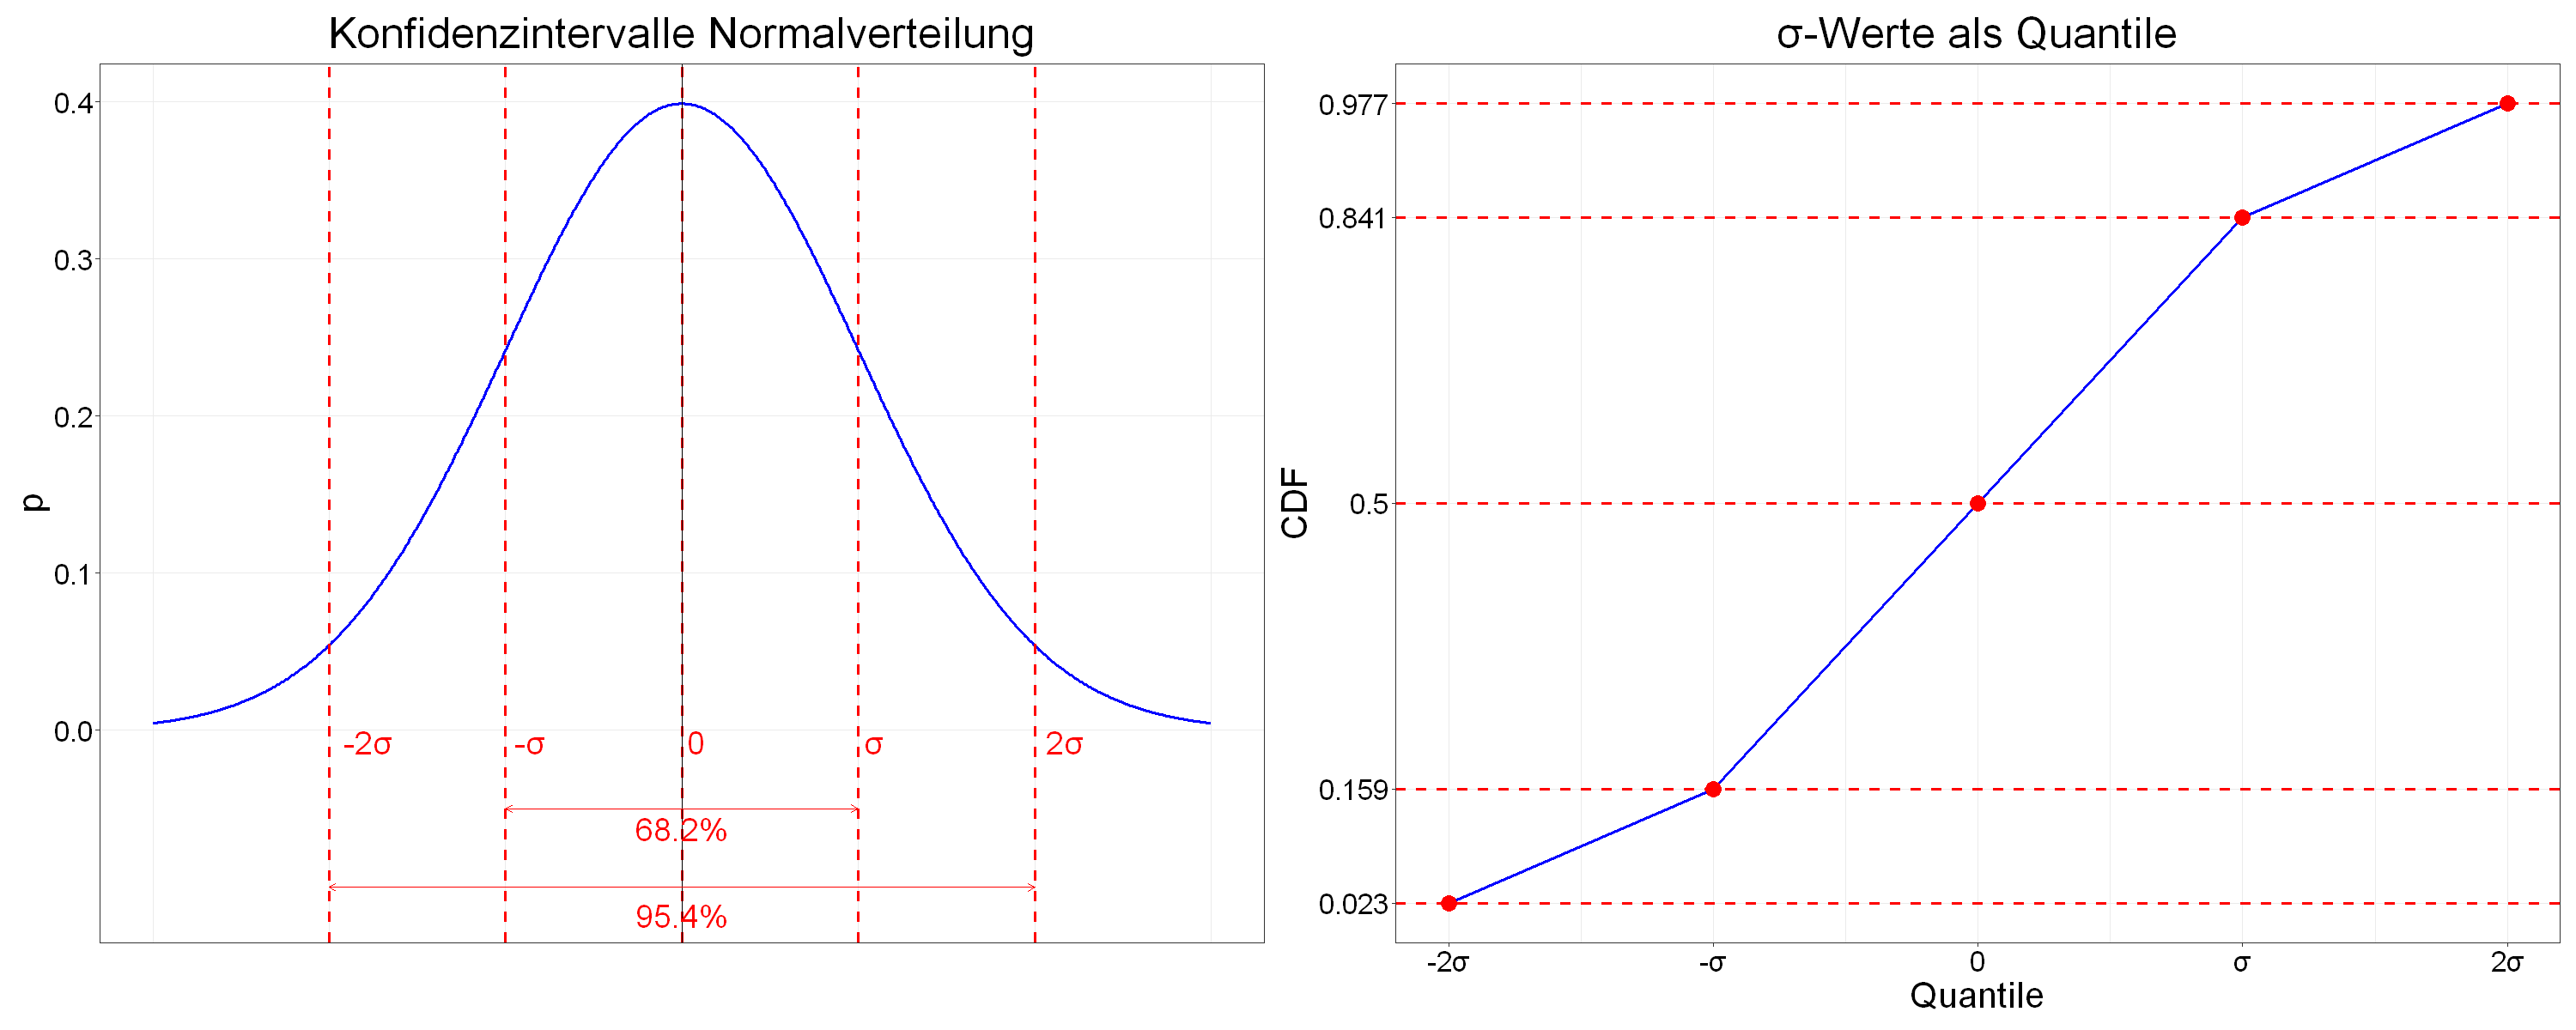

In [3]:
# Daten
mean <- 0
sd <- 1
x <- seq(-3, 3, length.out = 1000)
y <- dnorm(x, mean, sd)
data <- data.frame(x = x, y = y)

quantiles <- c(-2, -1, 0, 1, 2)
quantile_values <- pnorm(quantiles)
quantile_data <- data.frame( quantiles = quantiles, values = quantile_values, labels = paste0(quantiles, "σ") ) 
quantile_data$labels <- gsub("1σ", "σ", quantile_data$labels)
quantile_data$labels <- gsub("0σ", "0", quantile_data$labels)

# Dichteplot
dist_plot <- ggplot(data, aes(x = x, y = y)) +
  geom_line(color = "blue", linewidth=1) +
  geom_vline(xintercept = quantiles, linetype = "dashed", color = "red", linewidth=1) +
  geom_vline(xintercept = 0, linetype = "solid", color = "black") +
  # interval [-σ,σ]
  annotate("segment", x = -1, xend = 1, y = -0.05, yend = -0.05, 
           arrow = arrow(length = unit(0.2, "cm"), ends = "both"), color = "red") +
  annotate("text", x = 0, y = -0.055, label = "68.2%", color = "red", vjust = 1, hjust = 0.5, size=8) +
  # interval [-2σ,2σ]
  annotate("segment", x = -2, xend = 2, y = -0.1, yend = -0.1, 
           arrow = arrow(length = unit(0.2, "cm"), ends = "both"), color = "red") +
  annotate("text", x = 0, y = -0.11, label = "95.4%", color = "red", vjust = 1, hjust = 0.5, size=8) +
  # σ labels
  annotate("text", x = quantiles, y = rep(0, length(quantiles)), 
           label = quantile_data$labels, color = "red", vjust = 1, hjust = -0.3, size=8) +
  labs(title = "Konfidenzintervalle Normalverteilung",
       x = NULL,
       y = "p") +
  scale_y_continuous(breaks = seq(0,0.4,0.1), minor_breaks = NULL) +
  theme_jupyter() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank()) 

# Quantilplot
custom_breaks <- quantile_values
custom_labels <- format(round(quantile_values, 3), drop0trailing = TRUE)

quantile_plot <- ggplot(quantile_data, aes(x = quantiles, y = values)) +
  geom_line(color = "blue", linewidth=1) +
  geom_point(color = "red", size=5) +
  geom_hline(yintercept = quantile_values, linetype = "dashed", color = "red", linewidth=1) +
  scale_x_continuous(breaks = quantiles, labels = quantile_data$labels) +
  scale_y_continuous(labels = custom_labels, breaks = custom_breaks, minor_breaks = NULL) +
  labs(title = "σ-Werte als Quantile",
       x = "Quantile",
       y = "CDF") +
  theme_jupyter()

combined_plot <- dist_plot | quantile_plot
print(combined_plot)

## Median vs Erwartungswert einer $\chi^2$-Verteilung

### Daten

In [4]:
df <- 5

# Dichte
x_values <- seq(0, 20, length.out = 1000)

density_data <- data.frame(x = x_values, y = dchisq(x_values, df = df))
cdf_data <- data.frame(x = x_values, y = pchisq(x_values, df = df))

median <- qchisq(0.5, df = df)
# Mittelwert einer Chi-Quadrat Verteilung = df
mean <- df

### Plots

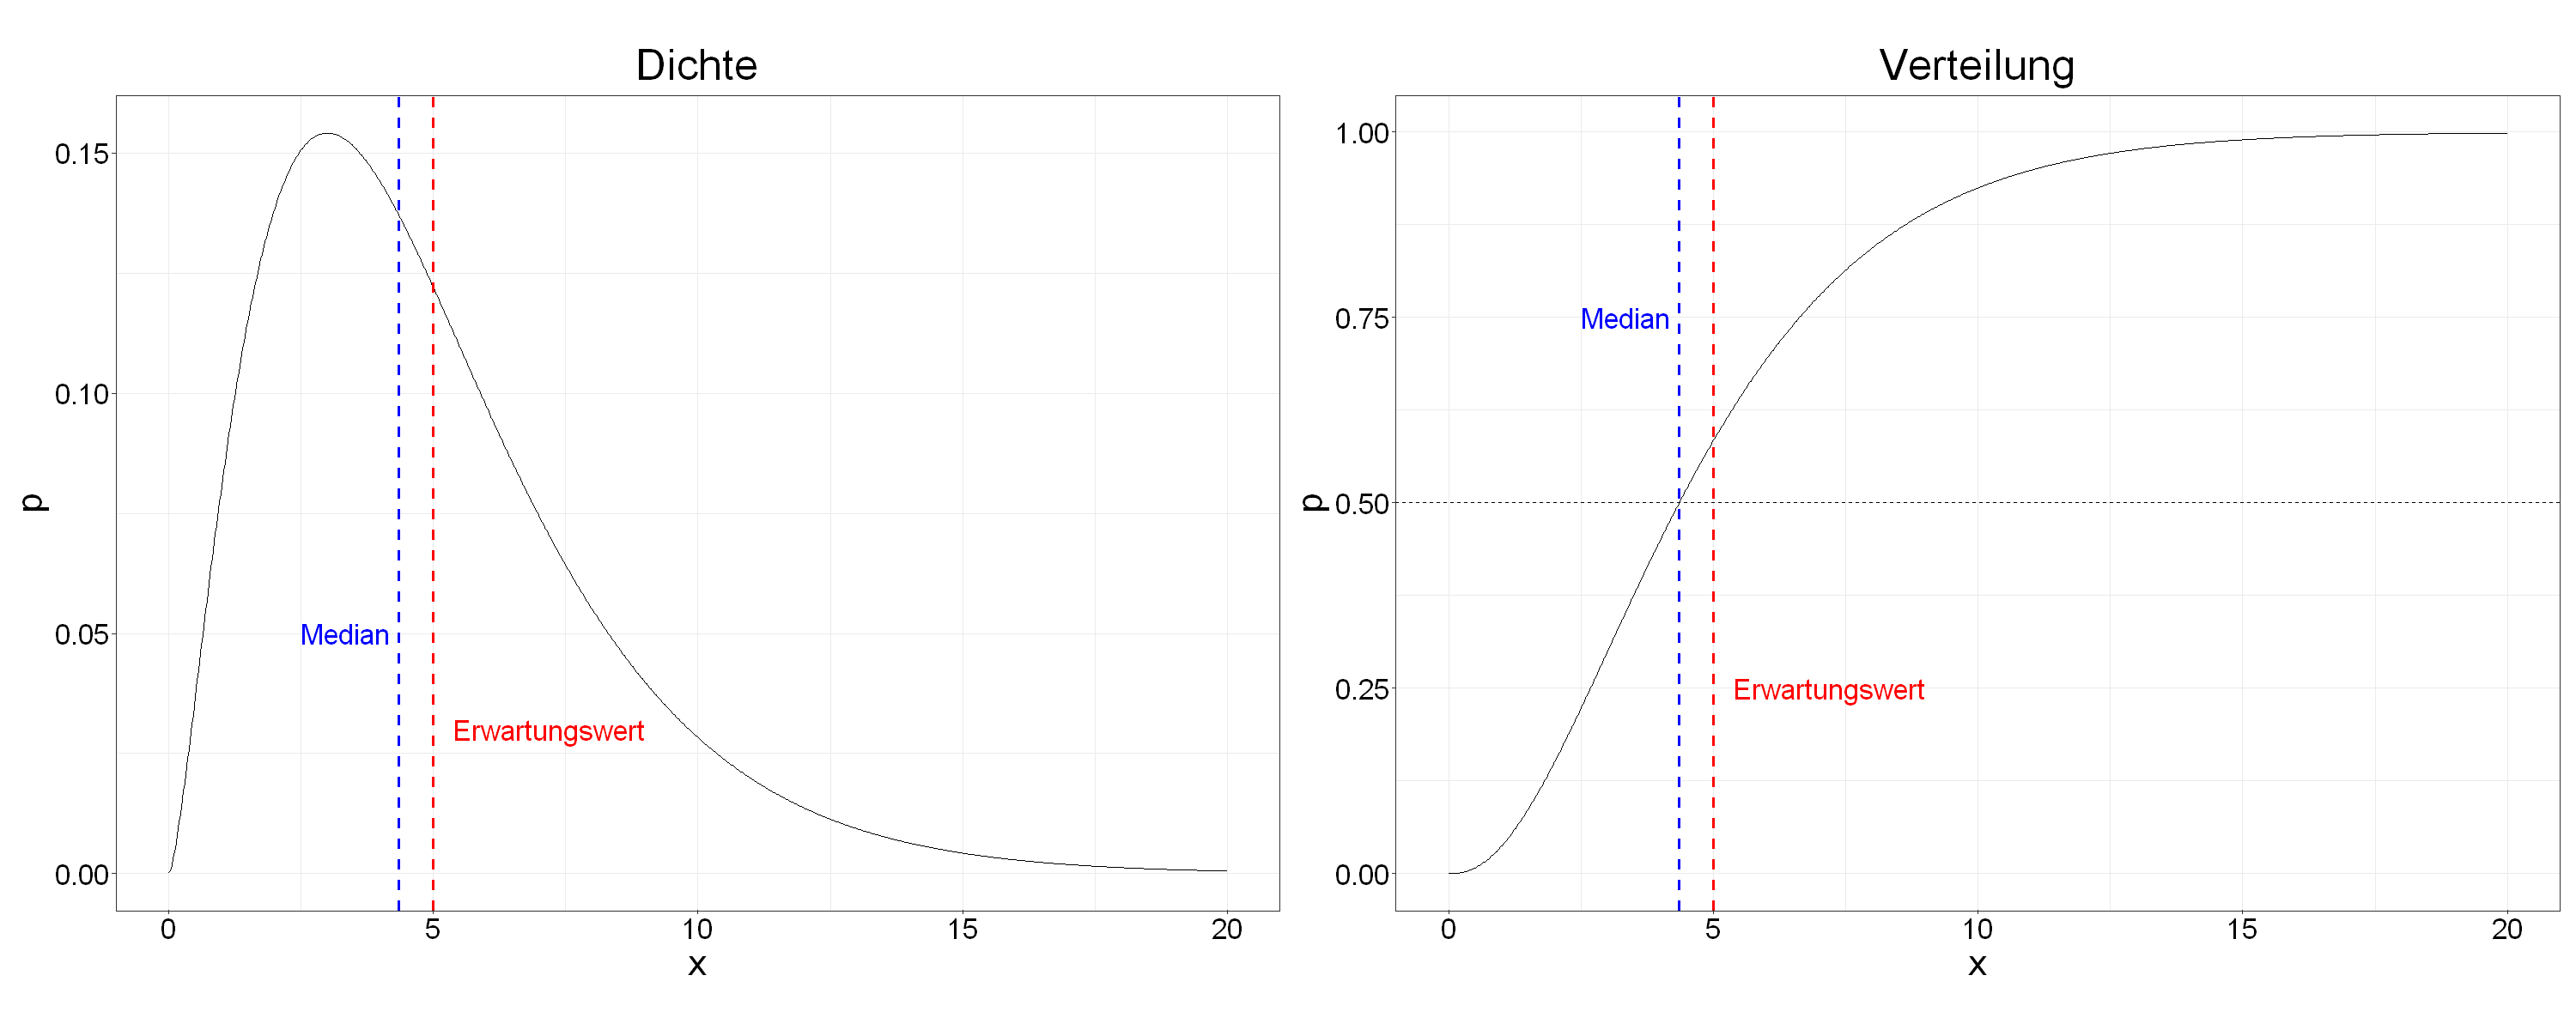

In [5]:
density_plot <- ggplot(density_data, aes(x = x, y = y)) +
  geom_line() +
  geom_vline(xintercept = median, linetype = "dashed", color = "blue", linewidth=1) +
  geom_vline(xintercept = mean, linetype = "dashed", color = "red", linewidth=1) +
  annotate("text", x = median, y = 0.05, label = "Median", hjust = 1.1, color = "blue", size=7) +
  annotate("text", x = mean, y = 0.03, label = "Erwartungswert", hjust = -0.1, color = "red", size=7) +
  labs(title="Dichte", x = "x", y = "p") +
  theme_jupyter() +    
  theme(aspect.ratio=0.7)

cdf_plot <- ggplot(cdf_data, aes(x = x, y = y)) +
  geom_line() +
  geom_vline(xintercept = median, color = "blue", linetype = "dashed", linewidth=1) +
  geom_vline(xintercept = mean, color = "red", linetype = "dashed", linewidth=1) +
  annotate("text", x = median, y = 0.75, label = "Median", hjust = 1.1, color = "blue", size=7) +
  annotate("text", x = mean, y = 0.25, label = "Erwartungswert", hjust = -0.1, color = "red", size=7) +
  geom_hline(yintercept = 0.5, linetype = "dashed") +
  labs(title="Verteilung", x = "x", y = "p") +
  theme_jupyter() + 
  theme(aspect.ratio=0.7)

median_plot = density_plot + cdf_plot
print(median_plot)